<a href="https://colab.research.google.com/github/ZahibVentura/M-todos-de-Optimizaci-n-/blob/main/Incendio_en_bosque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

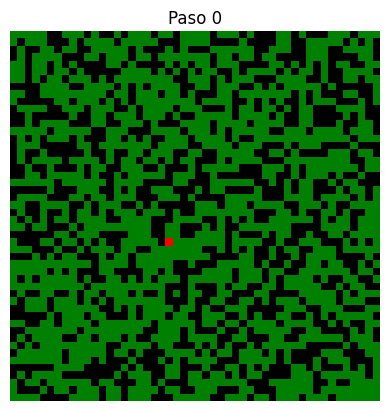

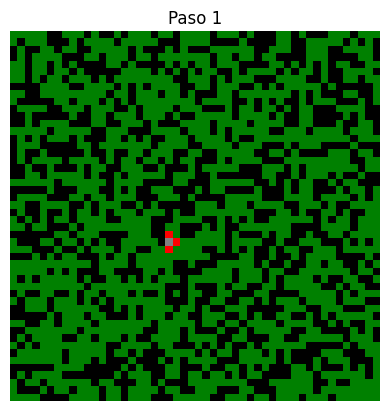

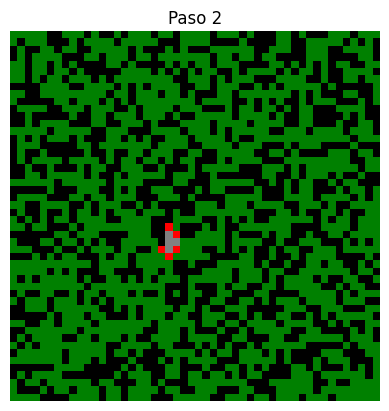

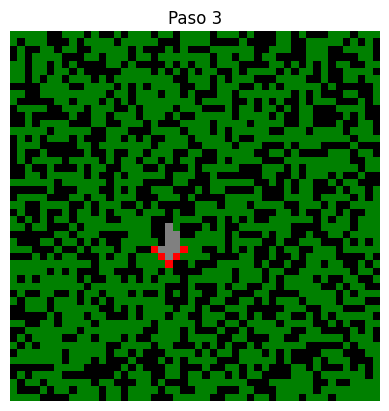

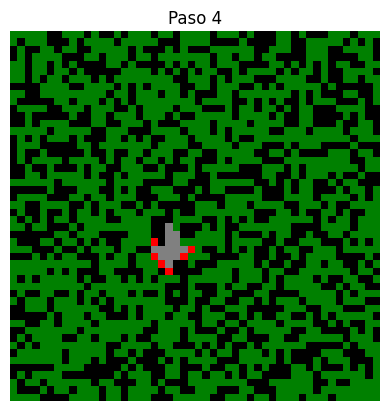

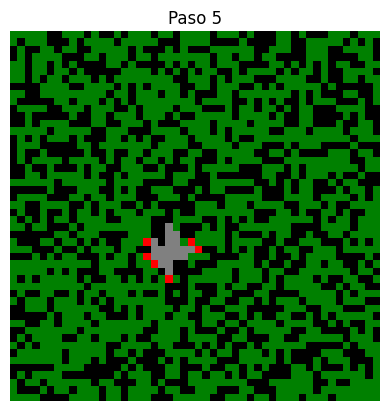

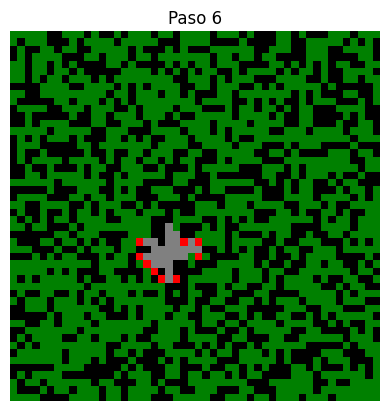

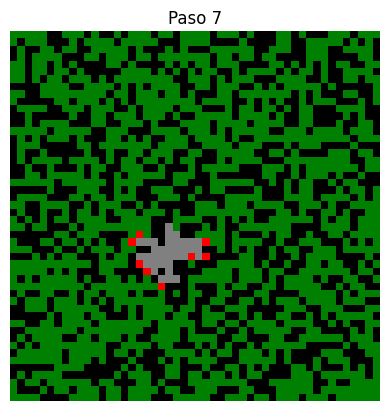

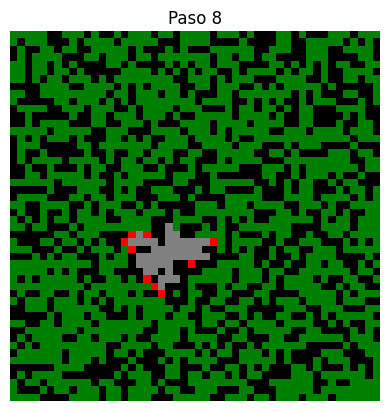

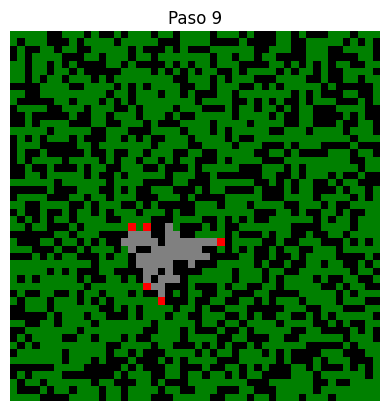

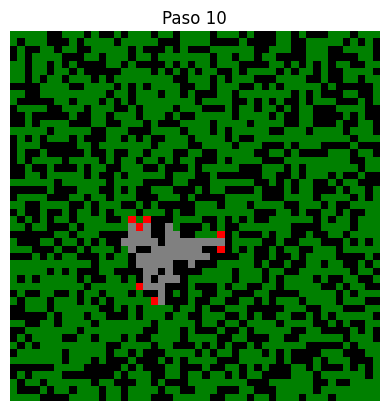

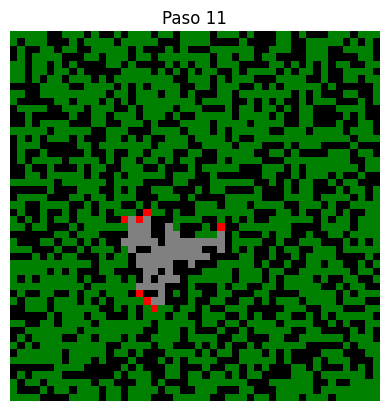

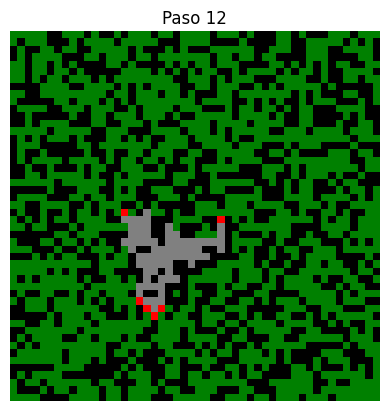

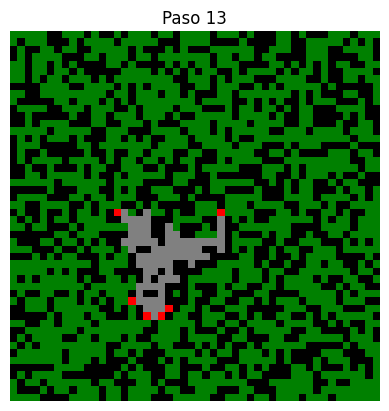

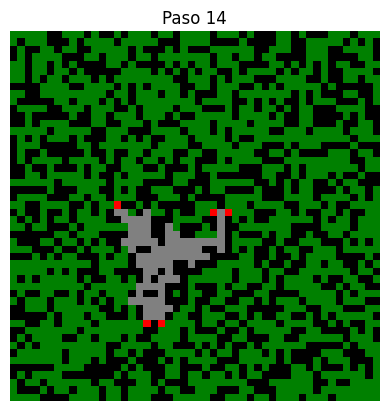

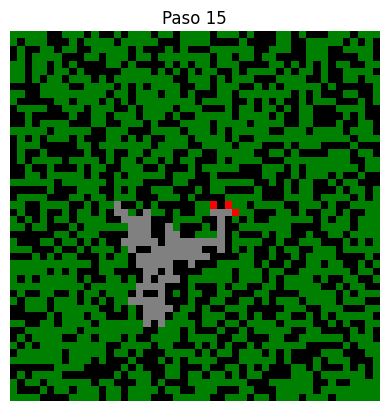

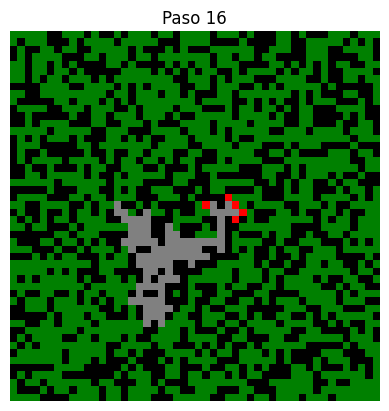

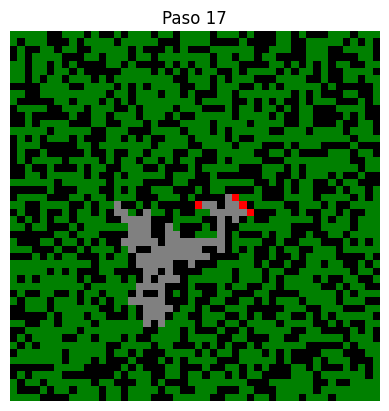

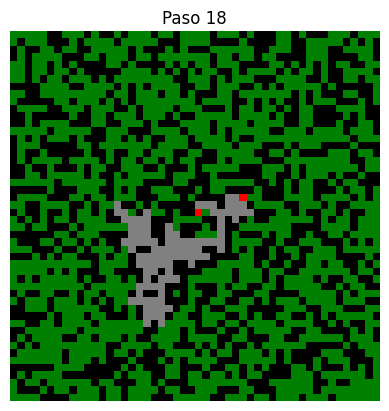

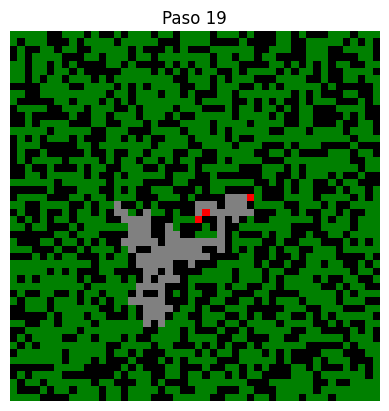

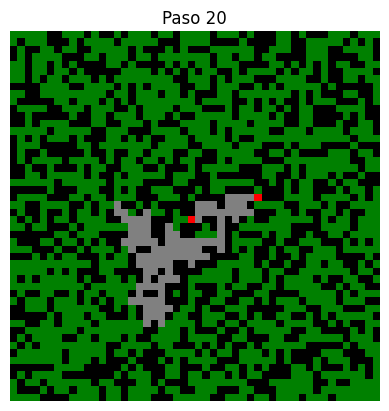

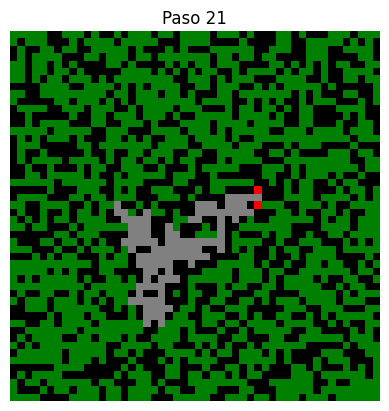

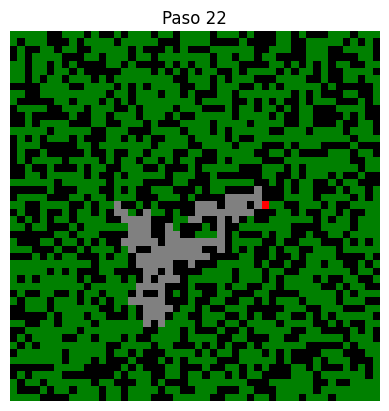

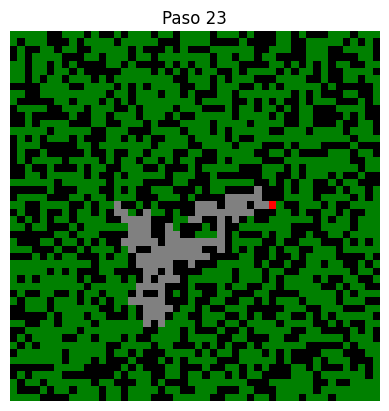

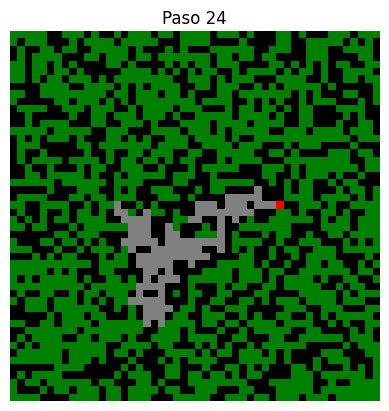

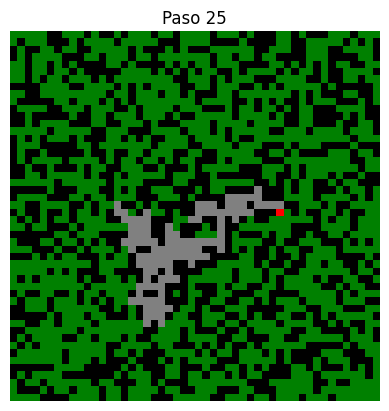

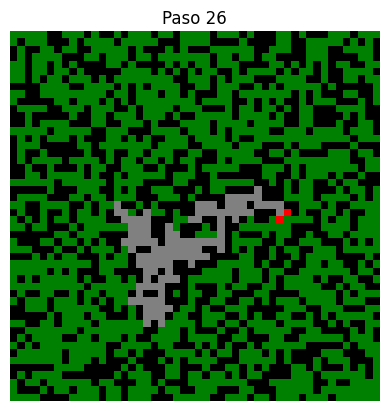

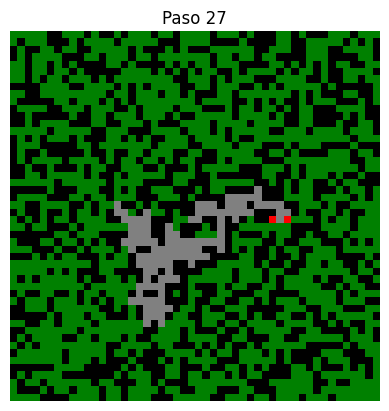

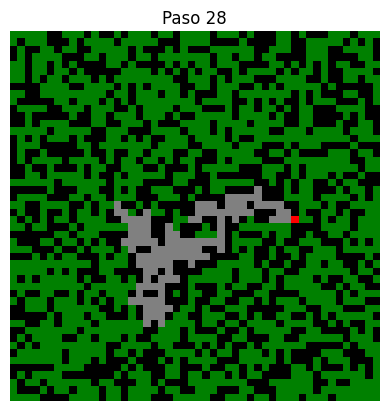

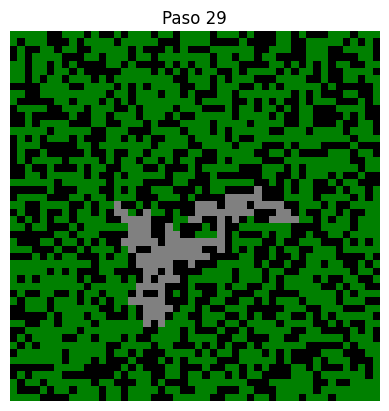

El incendio se ha extinguido.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Configuración de la cuadrícula del bosque
size = 50  # Tamaño del bosque (50x50)
density = 0.6  # Densidad de árboles (lambda)
prob_spread = 0.7  # Probabilidad de que el fuego se propague a los vecinos

# Estados de las celdas
EMPTY = 0      # Sin árbol
TREE = 1       # Árbol sin quemar (verde)
BURNING = 2    # Árbol en llamas
BURNED = 3     # Árbol quemado

# Crear el bosque con densidad lambda
forest = np.random.choice([EMPTY, TREE], size=(size, size), p=[1-density, density])

# Seleccionar una celda aleatoria para iniciar el incendio
start_x, start_y = np.random.randint(0, size), np.random.randint(0, size)
forest[start_x, start_y] = BURNING

# Configuración de colores para la visualización
cmap = mcolors.ListedColormap(['black', 'green', 'red', 'gray'])
bounds = [0, 1, 2, 3, 4]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Función para actualizar el bosque en cada paso de la simulación
def spread_fire(forest):
    new_forest = forest.copy()
    for i in range(size):
        for j in range(size):
            if forest[i, j] == BURNING:  # Si el árbol está en llamas
                # Intentar propagar el fuego a los vecinos
                for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Vecinos: arriba, abajo, izquierda, derecha
                    ni, nj = i + di, j + dj
                    if 0 <= ni < size and 0 <= nj < size and forest[ni, nj] == TREE:
                        if np.random.rand() < prob_spread:  # Probabilidad de propagación
                            new_forest[ni, nj] = BURNING
                # Árbol quemado una vez que el fuego se propaga
                new_forest[i, j] = BURNED
    return new_forest

# Ejecutar la simulación hasta que el fuego se extinga
def simulate_fire(forest, max_steps=100):
    for step in range(max_steps):
        plt.imshow(forest, cmap=cmap, norm=norm)
        plt.title(f"Paso {step}")
        plt.axis('off')
        plt.show()

        if BURNING not in forest:
            print("El incendio se ha extinguido.")
            break
        forest = spread_fire(forest)

# Ejecutar la simulación
simulate_fire(forest)